In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Header names
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x263e9d51908>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
JuneTemp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [5]:
#  3. Convert the June temperatures to a list.
June_Temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_Temp_df = pd.DataFrame(June_Temp)
print(June_Temp_df)

         0
0     78.0
1     76.0
2     78.0
3     76.0
4     77.0
...    ...
1695  79.0
1696  74.0
1697  74.0
1698  76.0
1699  75.0

[1700 rows x 1 columns]


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_Temp_df.describe()

,0
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
DecTemp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [10]:
# 7. Convert the December temperatures to a list.
Dec_Temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_Temp_df = pd.DataFrame(Dec_Temp)
print(Dec_Temp_df)

         0
0     76.0
1     74.0
2     74.0
3     64.0
4     64.0
...    ...
1512  71.0
1513  71.0
1514  69.0
1515  65.0
1516  65.0

[1517 rows x 1 columns]


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_Temp_df.describe()

,0
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


(0.0, 400.0)

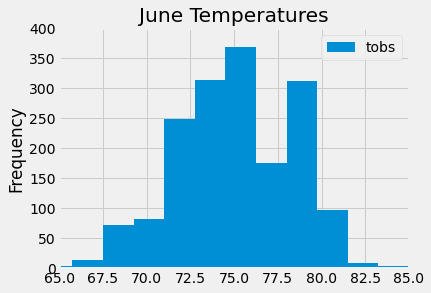

In [15]:
# June Temp Plot
June_Temp_df = pd.DataFrame(June_Temp, columns=['tobs'])
June_Temp_df.plot.hist(bins=12)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([65, 85])
plt.ylim([0,400])

(0.0, 400.0)

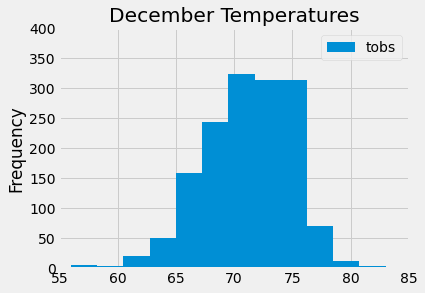

In [20]:
# Dec Temp Plot
Dec_Temp_df = pd.DataFrame(Dec_Temp, columns=['tobs'])
Dec_Temp_df.plot.hist(bins=12)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([55,85])
plt.ylim([0,400])